In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vlad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
df = pd.read_csv("datasets/new_spam.csv")

In [4]:
df = df[:7000]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7000 non-null   object
 1   text    7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [7]:
df["label"].unique()

array(['Spam', 'Ham'], dtype=object)

In [8]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [9]:
label_count = df['label'].value_counts()

In [10]:
label_count

label
0    3711
1    3289
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2a7139f7f90>,
 [Text(-0.6242217298379329, -0.9057302203184672, 'Spam'),
  Text(0.624221729837933, 0.905730220318467, 'Not spam')],
 [Text(-0.3404845799115997, -0.4940346656282547, '53.0%'),
  Text(0.34048457991159975, 0.49403466562825465, '47.0%')])

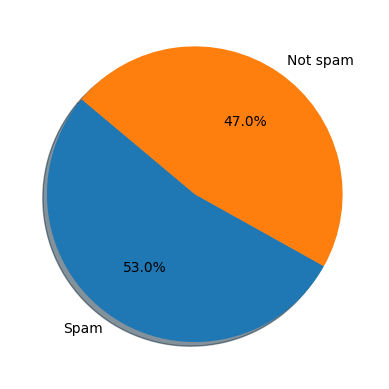

In [11]:
plt.pie(label_count.values, labels=["Spam", "Not spam"], startangle=140, autopct='%1.1f%%', shadow=True)

Text(0.5, 1.0, 'Lable count')

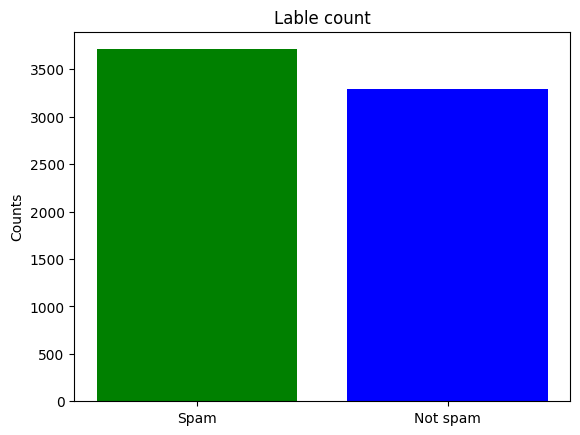

In [12]:
plt.bar(["Spam", "Not spam"], label_count, color=['green', "blue"])
plt.ylabel('Counts')
plt.title('Lable count')

In [13]:
df["text"] = df["text"].apply(lambda x: x.replace("\n", " "))

In [14]:
stop_word = set(stopwords.words("english"))

In [15]:
stemmer = PorterStemmer()
data = []

for i in range(len(df)):
  text = df["text"].iloc[i].lower()
  text = text.translate(str.maketrans("", "", string.punctuation)).split()
  text = [stemmer.stem(word) for word in text if word not in stop_word]
  text = " ".join(text)
  data.append(text)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data).toarray()

In [18]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y = df["label"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [70]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)

In [71]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (5600, 106017)
X_test shape (700, 106017)
y_train shape (5600,)
y_test shape (700,)


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [23]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred_mnb = mnb.predict(X_test)
mse_mnb = mean_squared_error(y_test, y_pred_mnb)
score_mnb = accuracy_score(y_test, y_pred_mnb)
print(f" MSE = {round(mse_mnb * 100, 2)}%, Score = {round(score_mnb * 100, 2)}%")

 MSE = 7.57%, Score = 92.43%


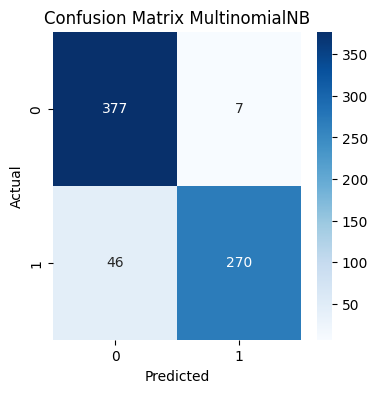

In [25]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(4, 4))
sb.heatmap(cm_mnb, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix MultinomialNB")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [28]:
y_pred_rfc = rfc.predict(X_test)
mse_rfc = mean_squared_error(y_test, y_pred_rfc)
score_rfc = accuracy_score(y_test, y_pred_rfc)
print(f" MSE = {round(mse_rfc * 100, 2)}%, Score = {round(score_rfc * 100, 2)}%")

 MSE = 6.71%, Score = 93.29%


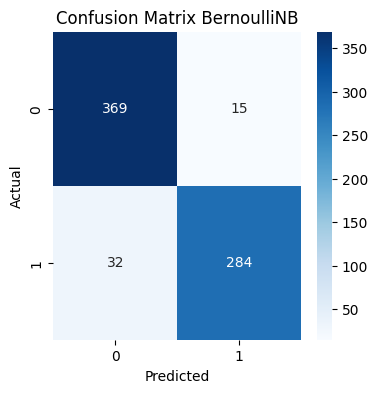

In [29]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(4, 4))
sb.heatmap(cm_rfc, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix BernoulliNB")
plt.show()

In [30]:
from tensorflow import keras
from keras.layers import Dense, Dropout

In [74]:
model = keras.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1], )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

In [75]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 512)                 │      54,281,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,445,569 (207.69 MB)

 Trainable params: 54,445,569 (207.69 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
early_stop = keras.callbacks.EarlyStopping(patience=1, monitor="val_loss")

In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid), callbacks=[early_stop])

Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 62s 312ms/step - accuracy: 0.8140 - loss: 0.5201 - val_accuracy: 0.9600 - val_loss: 0.1393
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 51s 290ms/step - accuracy: 0.9770 - loss: 0.1377 - val_accuracy: 0.9643 - val_loss: 0.1053
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 49s 277ms/step - accuracy: 0.9938 - loss: 0.1580 - val_accuracy: 0.9586 - val_loss: 0.1471


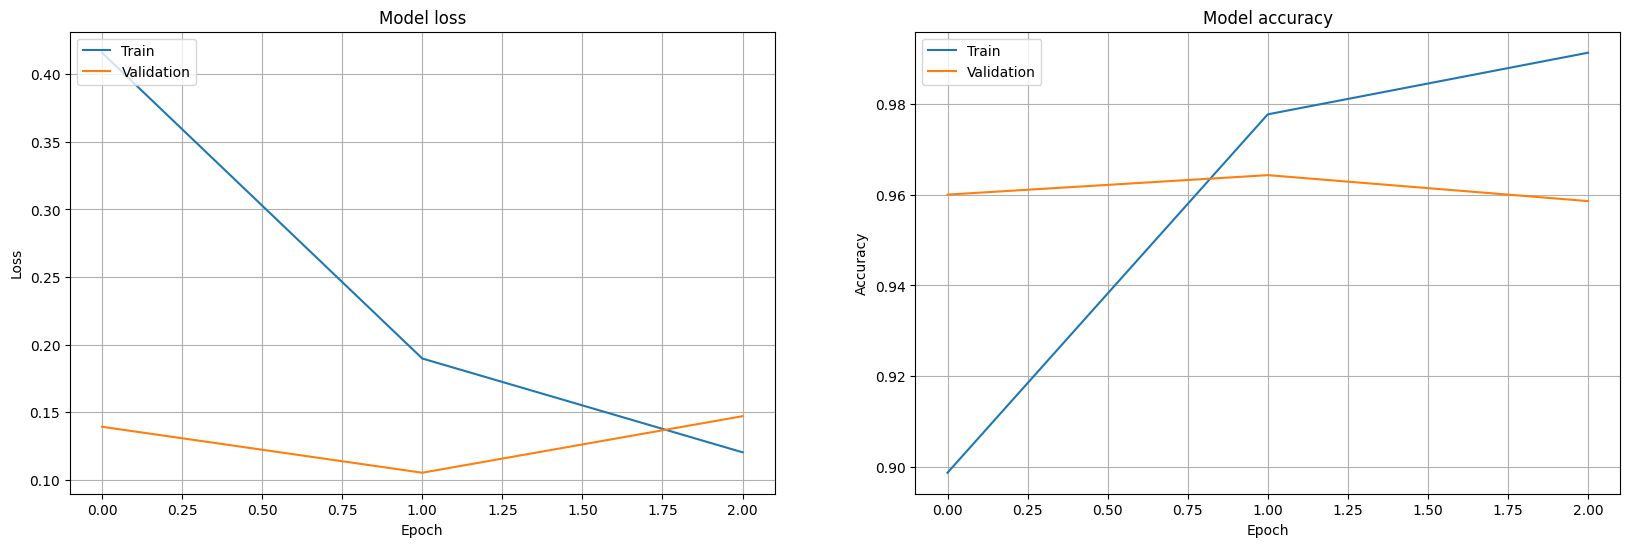

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [81]:
model.save("new_spam.keras")